### Notes
- probably not enough data to use word to vec

In [2]:
# Imports

# Custom imports
from utils import accessors
from datetime import datetime as dt
import string
#import pandas as pd

In [3]:
show_outputs = True

In [4]:
path = "dataset/"
add_file = "addresses.jsonl"
cit_file = "cities.jsonl"

add_df = accessors.load_data(path, add_file) 
cit_df = accessors.load_data(path, cit_file) 

if show_outputs: 
    display(add_df)
    display(cit_df)

,address,country
0,Mitterweg Angath,AT
1,"josef-franz-huter-straße 72 6020, innsbruck, a...",AT
2,"FLIRSCHBERG FLIRSCH, ÖSTERREICH",AT
3,Lochbödele Landeck Austria,AT
4,"Ainet 75 9951, Ainet",AT
...,...,...
595491,RUE DU JEU DE PAUME VILLEPREUX,FR
595492,"78955, CARRIÈRES-SOUS-POISSY",FR
595493,rue du cèdre - morainvilliers,FR
595494,"Boissets, France",FR


,city,country
0,Kappl,AT
1,Schmirn,AT
2,Zams,AT
3,Wattenberg,AT
4,Polling in Tirol,AT
...,...,...
77476,Saint-Mesmin,FR
77477,Vernoux-en-Vivarais,FR
77478,Sedze-Maubecq,FR
77479,Bulat-Pestivien,FR


### Preprocess data

In [5]:
# Set all addresses and cities to lowercase
add_df['address'] = add_df['address'].str.lower()
cit_df['city'] = cit_df['city'].str.lower()

# Remove punctuation 
add_df['address'] = add_df['address'].str.replace('[{}]'.format(string.punctuation), '', regex=True)
cit_df['city'] = cit_df['city'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

### Quick data analytics

address    0
country    0
dtype: int64
city       0
country    0
dtype: int64
15


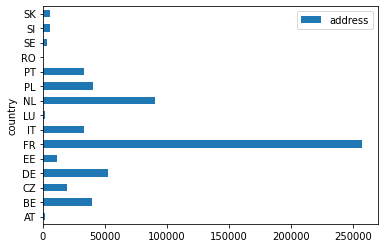

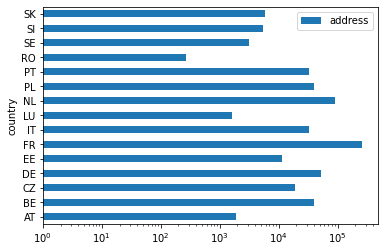

In [6]:
# Any nans in the dataset?
print(add_df.isna().sum())
print(cit_df.isna().sum())

# Number of occurences of each country 
countries = add_df.groupby('country').count()
countries.plot.barh()
countries.plot.barh(log = True)
print(len(countries))
# (TODO: stratify train/test split over this distribtion)

# Simple solution 
Split address into tokens and brute force search in database 

In [14]:
t1 = dt.now()
# Split the address into a list
add_df['address_split'] = add_df['address'].str.split()

add_df = add_df.head(20)

# Loop over each row and
for i, row in add_df.iterrows(): 
    address = row['address_split']
    for token in address: 
        print(token)
        if token in cit_df['city'].values:
            add_df.loc[i, 'country_out'] = cit_df.loc[cit_df['city'] == token, 'country'].item()
            
display(add_df)

t2 = dt.now()
print("Time for calculation: {}".format((t2-t1)))

mitterweg
angath
joseffranzhuterstraße
72
6020
innsbruck
austria
flirschberg
flirsch
österreich
lochbödele
landeck
austria
ainet
75
9951
ainet
klammer
mühle
1
obsteig
austria
gurnau
grins
6130
schwaz
alpbach
alpbach
mariastein
mariastein
fulpmes
wildermieming
austria
oberletzen
29
6600
pflach
see
mieming
pirchmoos
söll
tschaffinisumgebung
4
6166
fulpmes
drdorrekstrasse
schwaz
leithener
dorfstraße
reith
bei
seefeld
kogl
3
ampass
austria
forchachstrasse
7
6166
fulpmes
austria


,address,country,address_split,country_out
0,mitterweg angath,AT,"[mitterweg, angath]",AT
1,joseffranzhuterstraße 72 6020 innsbruck austria,AT,"[joseffranzhuterstraße, 72, 6020, innsbruck, a...",AT
2,flirschberg flirsch österreich,AT,"[flirschberg, flirsch, österreich]",AT
3,lochbödele landeck austria,AT,"[lochbödele, landeck, austria]",AT
4,ainet 75 9951 ainet,AT,"[ainet, 75, 9951, ainet]",AT
5,klammer mühle 1 obsteig austria,AT,"[klammer, mühle, 1, obsteig, austria]",AT
6,gurnau grins,AT,"[gurnau, grins]",AT
7,6130 schwaz,AT,"[6130, schwaz]",AT
8,alpbach alpbach,AT,"[alpbach, alpbach]",AT
9,mariastein mariastein,AT,"[mariastein, mariastein]",AT


Time for calculation: 0:00:00.206777


,address,country,address_split
0,mitterweg angath,AT,"[mitterweg, angath]"
1,joseffranzhuterstraße 72 6020 innsbruck austria,AT,"[joseffranzhuterstraße, 72, 6020, innsbruck, a..."
2,flirschberg flirsch österreich,AT,"[flirschberg, flirsch, österreich]"
3,lochbödele landeck austria,AT,"[lochbödele, landeck, austria]"
4,ainet 75 9951 ainet,AT,"[ainet, 75, 9951, ainet]"
...,...,...,...
595491,rue du jeu de paume villepreux,FR,"[rue, du, jeu, de, paume, villepreux]"
595492,78955 carrièressouspoissy,FR,"[78955, carrièressouspoissy]"
595493,rue du cèdre morainvilliers,FR,"[rue, du, cèdre, morainvilliers]"
595494,boissets france,FR,"[boissets, france]"


In [13]:
#cit_df['country'][cit_df['city'] == 'zams']
cit_df.loc[cit_df['city'] == 'claire', 'country'].item()

ValueError: can only convert an array of size 1 to a Python scalar

### Shortcomings
- not all addresses are following the same format, e.g. some have comma's, some do not. So end up with useless characters in your lists
- not all cities are one single string 
- special characters might change (e.g. ß or ss) 
